<a href="https://colab.research.google.com/github/Mahiliny23/ML/blob/main/Linear_Regression_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the dataset
advertising = pd.read_csv('/content/drive/MyDrive/Linear Regression/advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [7]:
#Checking NULL values
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

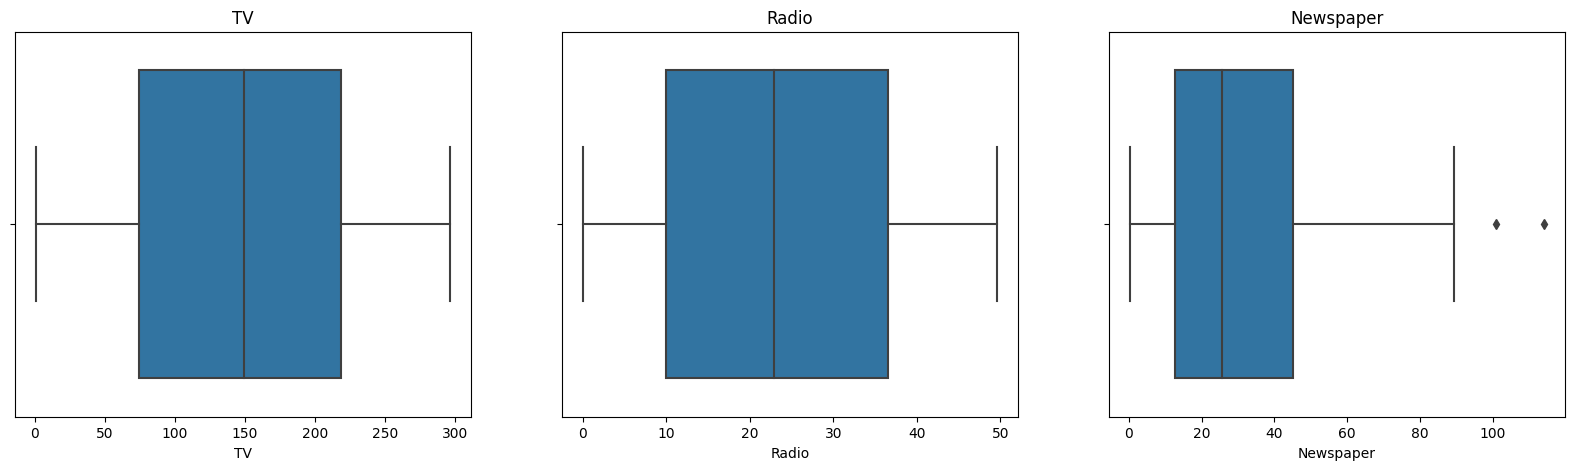

In [8]:
#Outlier analysis
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plt.title('TV')
sns.boxplot(x = advertising['TV'] )

plt.subplot(1,3,2)
plt.title('Radio')
sns.boxplot(x = advertising['Radio'] )

plt.subplot(1,3,3)
plt.title('Newspaper')
sns.boxplot(x = advertising['Newspaper'] )

plt.show()

In [9]:
#There are no considerable outliers in the data.

## Exploratory Data Analysis

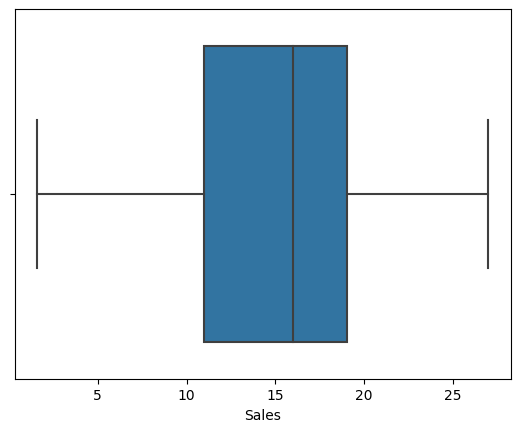

In [10]:
sns.boxplot(x = advertising['Sales'])
plt.show()

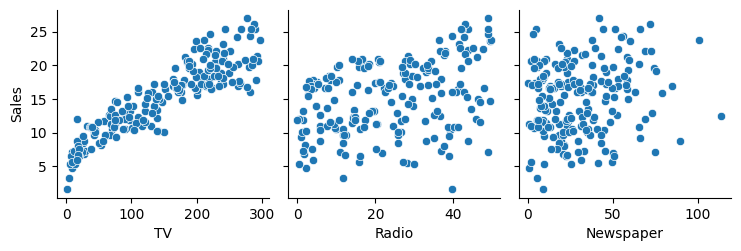

In [11]:
#Let's see how sales are related with other variables using scatter plot
sns.pairplot(advertising, x_vars= ['TV', 'Radio', 'Newspaper'], y_vars= ['Sales'])
plt.show()

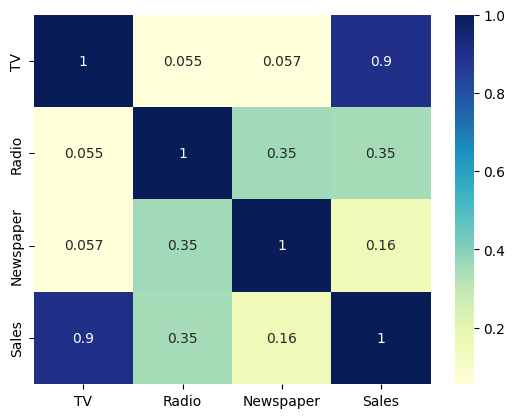

In [12]:
#Let's see the correlation between different variables
sns.heatmap(advertising.corr(), cmap = "YlGnBu", annot = True)
plt.show()

As visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So, let's go ahead and perform simple linear regression using TV as our feature variable.

### **Model Building**

In [13]:
X = advertising['TV']
Y = advertising['Sales']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size =0.7, test_size = 0.3, random_state=100)

In [15]:
#Let's look the train dataset
X_train_reshaped = X_train.values.reshape(-1,1)

In [16]:
X_train_reshaped_df = pd.DataFrame(X_train_reshaped, columns=['TV'])


In [17]:
Y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [18]:
# Create a linear regression model
model = LinearRegression()

In [19]:
# Fit the model to the training data
model.fit(X_train_reshaped, Y_train)

LinearRegression()

In [20]:
X_test_reshaped = X_test.values.reshape(-1,1)
Y_pred = model.predict(X_test_reshaped)
Y_train_pred = model.predict(X_train_reshaped)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squard Error: {mse}')
print(f'R-Squard: {r2}')

Mean Squard Error: 4.077556371826948
R-Squard: 0.7921031601245662


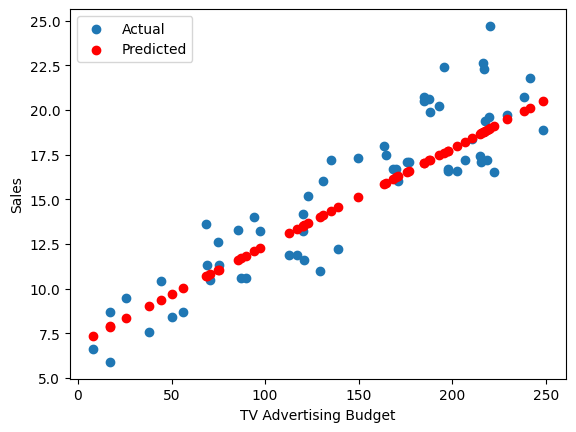

In [21]:
plt.scatter(X_test, Y_test, label = 'Actual')
plt.scatter(X_test, Y_pred, color ='red', label = 'Predicted')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

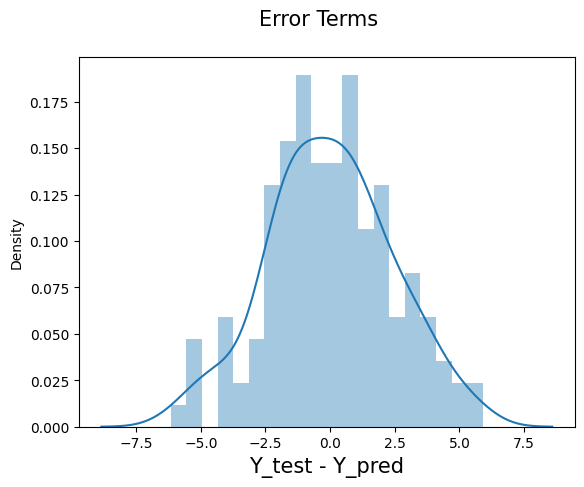

In [22]:
fig = plt.figure()
residuals = Y_train - Y_train_pred
sns.distplot(residuals,bins = 20)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Y_test - Y_pred', fontsize = 15)
plt.show()

The residuals are approximately normally distributed with the mean of 0. So, all good.